In [75]:
# import libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# Import the dataset
df=pd.read_csv('/content/drive/MyDrive/AirPassengers.csv', index_col='Month')
df.head(2)

,#Passengers
Month,
1949-01,112
1949-02,118


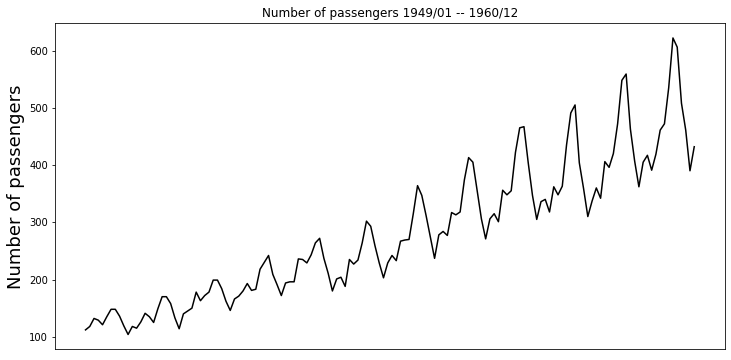

In [78]:
# visualize the number of passengers
plt.figure(figsize=(12,6))
plt.title('Number of passengers 1949/01 -- 1960/12')
plt.plot(df['#Passengers'], color='black')
plt.xlabel('Month', fontsize=18)
plt.ylabel('Number of passengers', fontsize=18)
ax=plt.gca()
ax.get_xaxis().set_visible(False)
plt.show()

In [79]:
df.shape

(144, 1)

In [80]:
# Create a new dataframe with only the "#Passengers" column
data_df=df.filter(['#Passengers'])
# Convert the dataframe to a numpy array
data=data_df.values
print(data[:5])

[[112]
 [118]
 [132]
 [129]
 [121]]


In [81]:
# Scale the data 
sc=MinMaxScaler(feature_range=(0,1))
data_scaled=sc.fit_transform(data)
data_scaled[:10]

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753]])

In [82]:
# Split data into inputs and outputs
# predict the actual month's number of passengers using the past 5 month number of passengers
X_data=[]
y_data=[]
look_back=5 # the number of previous months to take as input
for i in range(len(data_scaled)-5):
  X_data.append(data_scaled[i:(i+look_back),0]) # la colonne 0
  y_data.append(data_scaled[i+look_back,0])
X_data,y_data=np.array(X_data),np.array(y_data)
print(X_data)
print(y_data)

[[0.01544402 0.02702703 0.05405405 0.04826255 0.03281853]
 [0.02702703 0.05405405 0.04826255 0.03281853 0.05984556]
 [0.05405405 0.04826255 0.03281853 0.05984556 0.08494208]
 [0.04826255 0.03281853 0.05984556 0.08494208 0.08494208]
 [0.03281853 0.05984556 0.08494208 0.08494208 0.06177606]
 [0.05984556 0.08494208 0.08494208 0.06177606 0.02895753]
 [0.08494208 0.08494208 0.06177606 0.02895753 0.        ]
 [0.08494208 0.06177606 0.02895753 0.         0.02702703]
 [0.06177606 0.02895753 0.         0.02702703 0.02123552]
 [0.02895753 0.         0.02702703 0.02123552 0.04247104]
 [0.         0.02702703 0.02123552 0.04247104 0.07142857]
 [0.02702703 0.02123552 0.04247104 0.07142857 0.05984556]
 [0.02123552 0.04247104 0.07142857 0.05984556 0.04054054]
 [0.04247104 0.07142857 0.05984556 0.04054054 0.08687259]
 [0.07142857 0.05984556 0.04054054 0.08687259 0.12741313]
 [0.05984556 0.04054054 0.08687259 0.12741313 0.12741313]
 [0.04054054 0.08687259 0.12741313 0.12741313 0.1042471 ]
 [0.08687259 0

In [83]:
# reshaping 
X_data=np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1))

In [84]:
X_data.shape

(139, 5, 1)

In [85]:
# Split data into Test and Train sets 
### Get the number of rows in train and test set
train_size=math.ceil(len(X_data)*0.8)
test_size=len(X_data-train_size)
X_train=X_data[:train_size, :]
X_test=X_data[train_size:len(X_data),:]
y_train=y_data[:train_size]
y_test=y_data[train_size:len(y_data)]

In [86]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(112, 5, 1)
(112,)
(27, 5, 1)
(27,)


In [87]:
# Building the RNN model
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
# Ajouter la couche de sortie
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_30 (LSTM)              (None, 5, 50)             10400     
                                                                 
 lstm_31 (LSTM)              (None, 5, 50)             20200     
                                                                 
 lstm_32 (LSTM)              (None, 5, 50)             20200     
                                                                 
 lstm_33 (LSTM)              (None, 50)                20200     
                                                                 
 dense_10 (Dense)            (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [88]:
# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 7s 21ms/step - loss: 0.0995
Epoch 2/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0697
Epoch 3/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0362
Epoch 4/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0254
Epoch 5/100
4/4 [==============================] - 0s 15ms/step - loss: 0.0334
Epoch 6/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0244
Epoch 7/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0242
Epoch 8/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0237
Epoch 9/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0197
Epoch 10/100
4/4 [==============================] - 0s 17ms/step - loss: 0.0175
Epoch 11/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0168
Epoch 12/100
4/4 [==============================] - 0s 16ms/step - loss: 0.0139
Epoch 13/100
4/4 [==============================]

In [89]:
# Making predictions
y_pred=model.predict(X_test)
y_pred=sc.inverse_transform(y_pred)
Y_test=y_test.reshape(y_test.shape[0],1)
Y_test=sc.inverse_transform(Y_test)

##### Using **04 LSTM layers**, and taking as input the number of passengers in **the 05 previous months** to predict the number of assengers in the actual month

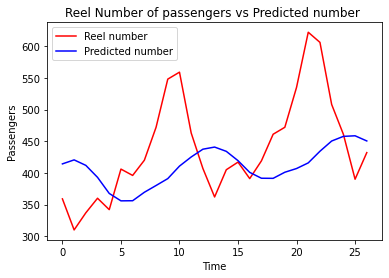

In [90]:
# Visualize the results
plt.plot(Y_test, color='red',label='Reel number')
plt.plot(y_pred, color='blue',label='Predicted number')
plt.title('Reel Number of passengers vs Predicted number ')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()

##### Using **02 LSTM layers**, and taking as input the number of passengers in **the 05 previous months** to predict the number of assengers in the actual month

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 5, 50)             10400     
                                                                 
 lstm_35 (LSTM)              (None, 50)                20200     
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
4/4 [==============================] - 4s 9ms/step - loss: 0.0948
Epoch 2/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0605
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.0294
Epoch 4/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0180

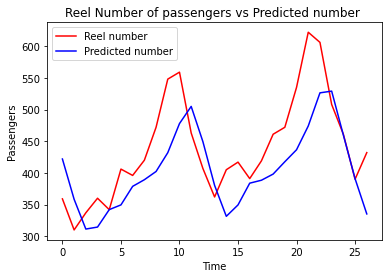

In [91]:
# Building the RNN model
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32)
# Making predictions
y_pred=model.predict(X_test)
y_pred=sc.inverse_transform(y_pred)
Y_test=y_test.reshape(y_test.shape[0],1)
Y_test=sc.inverse_transform(Y_test)
# Visualize the results
plt.plot(Y_test, color='red',label='Reel number')
plt.plot(y_pred, color='blue',label='Predicted number')
plt.title('Reel Number of passengers vs Predicted number ')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()

##### Using **04 LSTM layers**, and taking as input the number of passengers in **the 02 previous months** to predict the number of assengers in the actual month

[[0.01544402 0.02702703]
 [0.02702703 0.05405405]
 [0.05405405 0.04826255]
 [0.04826255 0.03281853]
 [0.03281853 0.05984556]
 [0.05984556 0.08494208]
 [0.08494208 0.08494208]
 [0.08494208 0.06177606]
 [0.06177606 0.02895753]
 [0.02895753 0.        ]
 [0.         0.02702703]
 [0.02702703 0.02123552]
 [0.02123552 0.04247104]
 [0.04247104 0.07142857]
 [0.07142857 0.05984556]
 [0.05984556 0.04054054]
 [0.04054054 0.08687259]
 [0.08687259 0.12741313]
 [0.12741313 0.12741313]
 [0.12741313 0.1042471 ]
 [0.1042471  0.05598456]
 [0.05598456 0.01930502]
 [0.01930502 0.06949807]
 [0.06949807 0.07915058]
 [0.07915058 0.08880309]
 [0.08880309 0.14285714]
 [0.14285714 0.11389961]
 [0.11389961 0.13127413]
 [0.13127413 0.14285714]
 [0.14285714 0.18339768]
 [0.18339768 0.18339768]
 [0.18339768 0.15444015]
 [0.15444015 0.11196911]
 [0.11196911 0.08108108]
 [0.08108108 0.11969112]
 [0.11969112 0.12934363]
 [0.12934363 0.14671815]
 [0.14671815 0.17181467]
 [0.17181467 0.14864865]
 [0.14864865 0.15250965]


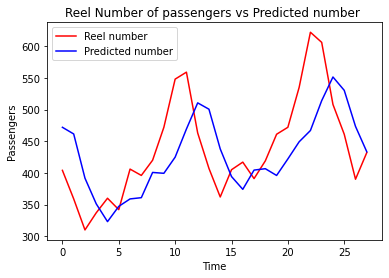

In [95]:
# Split data to inputs and outputs
# predict the actual month's number of passengers using the past 5 month number of passengers
X_data=[]
y_data=[]
look_back=2 
for i in range(len(data_scaled)-2):
  X_data.append(data_scaled[i:(i+look_back),0]) # la colonne 0
  y_data.append(data_scaled[i+look_back,0])
X_data,y_data=np.array(X_data),np.array(y_data)
print(X_data)
print(y_data)
# reshaping 
X_data=np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1))
# Split data into Test and Train sets 
### Get the number of rows in train and test set
train_size=math.ceil(len(X_data)*0.8)
test_size=len(X_data-train_size)
X_train=X_data[:train_size, :]
X_test=X_data[train_size:len(X_data),:]
y_train=y_data[:train_size]
y_test=y_data[train_size:len(y_data)]
# Building the RNN model
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32)
# Making predictions
y_pred=model.predict(X_test)
y_pred=sc.inverse_transform(y_pred)
Y_test=y_test.reshape(y_test.shape[0],1)
Y_test=sc.inverse_transform(Y_test)
# Visualize the results
plt.plot(Y_test, color='red',label='Reel number')
plt.plot(y_pred, color='blue',label='Predicted number')
plt.title('Reel Number of passengers vs Predicted number ')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()

##### Using **02 LSTM layers**, and taking as input the number of passengers in **the 02 previous months** to predict the number of assengers in the actual month

[[0.01544402 0.02702703]
 [0.02702703 0.05405405]
 [0.05405405 0.04826255]
 [0.04826255 0.03281853]
 [0.03281853 0.05984556]
 [0.05984556 0.08494208]
 [0.08494208 0.08494208]
 [0.08494208 0.06177606]
 [0.06177606 0.02895753]
 [0.02895753 0.        ]
 [0.         0.02702703]
 [0.02702703 0.02123552]
 [0.02123552 0.04247104]
 [0.04247104 0.07142857]
 [0.07142857 0.05984556]
 [0.05984556 0.04054054]
 [0.04054054 0.08687259]
 [0.08687259 0.12741313]
 [0.12741313 0.12741313]
 [0.12741313 0.1042471 ]
 [0.1042471  0.05598456]
 [0.05598456 0.01930502]
 [0.01930502 0.06949807]
 [0.06949807 0.07915058]
 [0.07915058 0.08880309]
 [0.08880309 0.14285714]
 [0.14285714 0.11389961]
 [0.11389961 0.13127413]
 [0.13127413 0.14285714]
 [0.14285714 0.18339768]
 [0.18339768 0.18339768]
 [0.18339768 0.15444015]
 [0.15444015 0.11196911]
 [0.11196911 0.08108108]
 [0.08108108 0.11969112]
 [0.11969112 0.12934363]
 [0.12934363 0.14671815]
 [0.14671815 0.17181467]
 [0.17181467 0.14864865]
 [0.14864865 0.15250965]


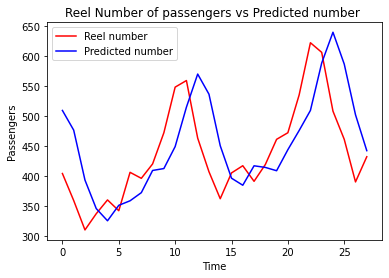

In [92]:
# Split data to inputs and outputs
# predict the actual month's number of passengers using the past 5 month number of passengers
X_data=[]
y_data=[]
look_back=2 
for i in range(len(data_scaled)-2):
  X_data.append(data_scaled[i:(i+look_back),0]) # la colonne 0
  y_data.append(data_scaled[i+look_back,0])
X_data,y_data=np.array(X_data),np.array(y_data)
print(X_data)
print(y_data)
# reshaping 
X_data=np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1))
# Split data into Test and Train sets 
### Get the number of rows in train and test set
train_size=math.ceil(len(X_data)*0.8)
test_size=len(X_data-train_size)
X_train=X_data[:train_size, :]
X_test=X_data[train_size:len(X_data),:]
y_train=y_data[:train_size]
y_test=y_data[train_size:len(y_data)]
# Building the RNN model
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32)
# Making predictions
y_pred=model.predict(X_test)
y_pred=sc.inverse_transform(y_pred)
Y_test=y_test.reshape(y_test.shape[0],1)
Y_test=sc.inverse_transform(Y_test)
# Visualize the results
plt.plot(Y_test, color='red',label='Reel number')
plt.plot(y_pred, color='blue',label='Predicted number')
plt.title('Reel Number of passengers vs Predicted number ')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()

##### Using **03 LSTM layers**, and taking as input the number of passengers in **the 01 previous months** to predict the number of assengers in the actual month

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]
 [0.1042471 ]
 [0.05598456]
 [0.01930502]
 [0.06949807]
 [0.07915058]
 [0.08880309]
 [0.14285714]
 [0.11389961]
 [0.13127413]
 [0.14285714]
 [0.18339768]
 [0.18339768]
 [0.15444015]
 [0.11196911]
 [0.08108108]
 [0.11969112]
 [0.12934363]
 [0.14671815]
 [0.17181467]
 [0.14864865]
 [0.15250965]
 [0.22007722]
 [0.24324324]
 [0.26640927]
 [0.2027027 ]
 [0.16795367]
 [0.13127413]
 [0.17374517]
 [0.17760618]
 [0.17760618]
 [0.25482625]
 [0.25289575]
 [0.24131274]
 [0.26833977]
 [0.30888031]
 [0.32432432]
 [0.25675676]
 [0.20656371]
 [0.14671815]
 [0.18725869]
 [0.19305019]
 [0.16216216]
 [0.25289575]
 [0.23745174]
 [0.25096525]
 [0.30888031]
 [0.38223938]
 [0.36486486]
 [0.2992278 ]
 [0.24131274]
 [0.19111969]
 [0.24

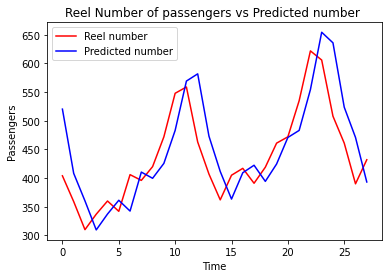

In [94]:
# Split data to inputs and outputs
# predict the actual month's number of passengers using the past 5 month number of passengers
X_data=[]
y_data=[]
look_back=1 
for i in range(len(data_scaled)-1):
  X_data.append(data_scaled[i:(i+look_back),0]) # la colonne 0
  y_data.append(data_scaled[i+look_back,0])
X_data,y_data=np.array(X_data),np.array(y_data)
print(X_data)
print(y_data)
# reshaping 
X_data=np.reshape(X_data, (X_data.shape[0], X_data.shape[1], 1))
# Split data into Test and Train sets 
### Get the number of rows in train and test set
train_size=math.ceil(len(X_data)*0.8)
test_size=len(X_data-train_size)
X_train=X_data[:train_size, :]
X_test=X_data[train_size:len(X_data),:]
y_train=y_data[:train_size]
y_test=y_data[train_size:len(y_data)]
# Building the RNN model
model=Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=32)
# Making predictions
y_pred=model.predict(X_test)
y_pred=sc.inverse_transform(y_pred)
Y_test=y_test.reshape(y_test.shape[0],1)
Y_test=sc.inverse_transform(Y_test)
# Visualize the results
plt.plot(Y_test, color='red',label='Reel number')
plt.plot(y_pred, color='blue',label='Predicted number')
plt.title('Reel Number of passengers vs Predicted number ')
plt.xlabel('Time')
plt.ylabel('Passengers')
plt.legend()
plt.show()

**Conclusion** </br>
We notice that the model performs better when we use *fewer LSTM layers* and *a less number of previous months* as input.